# Introducción a pandas

__pandas es una librería de análisis de datos en Python__ que nos provee de las estructuras de datos y herramientas para realizar análisis de manera rápida. Se articula sobre la biblioteca NumPy y nos permite enfrentarnos a situaciones en las que tenemos que manejar datos reales que requieren seguir un proceso de carga, limpieza, filtrado, reduccióń y análisis. 

_En esta clase veremos como cargar y guardar datos, las características de las pricipales estructuras de pandas y las aplicaremos a algunos problemas._

In [8]:
# Importamos pandas
import pandas as pd

In [9]:
# Otros imports
# La siguiente instruccion permite incorporar las graficas en este documento (sin que se abra una nueva ventana para cada grafica)
%matplotlib inline 

import matplotlib.pyplot as plt
import numpy as np

## Conozcamos pandas

Pandas tiene 3 estructuras de datos principales: DataFrame, Series y Panels (más avanzada).

### Dataframe
El DataFrame es una estructura de datos tabular que se compone de columnas y filas ordenadas. Para que todo sea más sencillo vamos a ver un ejemplo de creación de un DataFrame (tabla) de un diccionario de listas. El siguiente ejemplo muestra un diccionario que consta de dos keys, Name y Age, y su correspondiente lista de valores.

In [ ]:
nombre_edad = {
    'Nombre' : ['Cristian', 'Carlos', 'David'],
    'Edad' : [32, 55, 20]
}

df = pd.DataFrame(nombre_edad)
print(type(df))
df
# Jupyter nos genera una visualización más bonita de las tablas si ponemos la variable directamente en vez de print(data_frame)

In [ ]:
# Cambiar el orden de las columnas
df2 = pd.DataFrame(nombre_edad, columns = ['Edad', 'Nombre'])
df2

In [ ]:
# Se pueden generar alias para los nombres de nuestras filas
df2 = pd.DataFrame(nombre_edad, columns = ['Nombre', 'Edad'], index = ['a', 'b', 'c'])
df2

### Series
Series es un objeto unidimensional (1D) similar a la columna de una tabla. Si queremos crear un Series para un listado de nombres, podemos hacer lo siguiente:

In [ ]:
serie_nombres = pd.Series(['Cristian', 'Carlos', 'David'], index = [1, 2, 3])
print(serie_nombres)

### Crear un Dataframe con objetos Series

In [ ]:
serie_nombres = pd.Series(['Cristian', 'Carlos', 'David'], name="Nombre")
df = serie_nombres.to_frame()
print(type(df))
df

# Funciones de Pandas
Ejemplos de algunas de las funciones que podemos utilizar con DataFrame y Series.

## Head y Tail
Las funciones head() y tail() nos permiten ver una muestra de nuestros datos, especialmente cuando tenemos muchísimos. El número por defecto de elementos a mostrar es 5, pero se puede modificar.

Digamos que tenemos un Series compuesto por 20,000 elementos aleatorios (números):

In [ ]:
numeros = pd.Series(np.random.randn(20000))
print(numeros.head())
print(numeros.tail())

In [ ]:
# Algunos calculos
print(numeros.mean())
print(numeros.max())
print(numeros.min())

## Add
Ejemplo de uso de add, método que permite sumar elementos de nuestros dataframes

In [ ]:
dict_1 = {'A' : [5, 8, 10, 3, 9],'B' : [6, 1, 4, 8, 7]}
dict_2 = {'A' : [4, 3, 7, 6, 1],'B' : [9, 10, 10, 1, 2]}
data_frame_1 = pd.DataFrame(dict_1)
data_frame_2 = pd.DataFrame(dict_2)
data_frame_3 = data_frame_1.add(data_frame_2)
print(data_frame_1)
print(data_frame_2)
print(data_frame_3)

## Append
Ejemplo de uso de append, método que permite concatenar registros de nuestros dataframes

In [ ]:
nombre_edad = {
    "nombre": ["Cristian", "Jose", "Sara"], 
    "edad": [30, 40, 20]
}
data_frame = pd.DataFrame(nombre_edad)
#print(data_frame)

nombre_edad_2 = {
    "nombre": ["Cristian", "Jose", "Sara"], 
    "edad": [300, 400, 200]
}
data_frame_2 = pd.DataFrame(nombre_edad_2)
#print(data_frame_2)

# Realizo la concatenación
data_frame_total = data_frame.append(data_frame_2)
data_frame_total

Observar que los índices los ha concatenado pero no los ha reestructurado. A continuación la solución

In [ ]:
nombre_edad = {
    "nombre": ["Cristian", "Jose", "Sara"], 
    "edad": [30, 40, 20]
}
data_frame = pd.DataFrame(nombre_edad)
#print(data_frame)

nombre_edad_2 = {
    "nombre": ["Cristian", "Jose", "Sara"], 
    "edad": [300, 400, 200]
}
data_frame_2 = pd.DataFrame(nombre_edad_2)
#print(data_frame_2)

# Realizo la union
data_frame_total = data_frame.append(data_frame_2, ignore_index = True)
data_frame_total

## Append de data frames con columnas diferentes

In [ ]:
nombre_edad = {
    "nombre": ["Cristian", "Jose", "Sara"], 
    "edad": [30, 40, 20]
}
data_frame = pd.DataFrame(nombre_edad)
#print(data_frame)

nombre_edad_2 = {
    "nombre": ["Cristian", "Jose", "Sara"], 
    "edad": [300, 400, 200],
    "altura": [180, 200, 160]
}
data_frame_2 = pd.DataFrame(nombre_edad_2)
#print(data_frame_2)

# Realizo la union
data_frame_total = data_frame.append(data_frame_2, ignore_index = True)
data_frame_total

## Búsqueda y eliminación de nulos

In [ ]:
data_frame_total.isnull()

In [ ]:
# Número de nulos por columnas
data_frame_total.isnull().sum()

In [ ]:
# Número de nulos totales
data_frame_total.isnull().sum().sum()

In [ ]:
# Mostrar las filas que tienen nulos
data_frame_total[data_frame_total.isna().any(axis=1)]

In [ ]:
# Eliminación
data_frame_total = data_frame_total.dropna()
data_frame_total

In [ ]:
# Eliminación y reset de los indices
data_frame_total = data_frame.append(data_frame_2, ignore_index = True)
data_frame_total = data_frame_total.dropna()
data_frame_total = data_frame_total.reset_index(drop=True)
data_frame_total

## Búsqueda y sustitución de nulos

In [ ]:
# Recuperamos el DF original con los nulos
data_frame_total = data_frame.append(data_frame_2, ignore_index = True)
data_frame_total

In [ ]:
# Realizamos una copia
df_copia = data_frame_total.copy()
df_copia

In [ ]:
# Sustituimos todos los NaN por 0
df_copia = df_copia.fillna(0)
df_copia
# df_copia['altura'] = df_copia['altura'].fillna(0) # Sustituir NaN por 0 solo en una columna

# Ejemplo de carga de datos y exploración
Trabajaremos con el fichero csv weather.csv

## Carga del csv

In [1]:
df = pd.read_csv('weather.csv')
df

NameError: name 'pd' is not defined

## Tamaño

In [ ]:
# Número de filas
print(len(df))

## Columnas

In [ ]:
print(df.index)
print(df.columns)

## Valores

In [ ]:
print(df.values)

## Información general del dataframe

In [ ]:
df.info()

## Head y Tail

In [ ]:
df.head() # Primeras 5 filas

In [ ]:
df.head(10) # Primeras 10 filas

In [ ]:
df.tail() # Ultimas 5 filas

In [ ]:
df.tail(10) # Ultimas 10 filas

## Slicing

In [ ]:
# Hacer slicing al dataframe, obtener 10 filas ubicadas entre las filas 20 y 30
df[20:31]

## Acceder a una columna en concreto

In [ ]:
# Acceder a una columna en particular del dataframe
df['Humidity'].head(10) 

In [ ]:
# Hacer slicing al dataframe, obtener 10 filas ubicadas entre las filas 20 y 30
df["Humidity"][20:31]

## Algunos cálculos

In [ ]:
min_h = df['Humidity'].min()
max_h = df['Humidity'].max()
mean_h = df['Humidity'].mean(skipna = True) # Omitimos los nulos para este calculo
sum_h = df['Humidity'].sum()

id_min_h = df['Humidity'].idxmin()
id_max_h = df['Humidity'].idxmax()

print("Humedad mínima: {} -> Posición: {}".format(min_h, id_min_h))
print("Humedad máxima: {} -> Posición: {}".format(max_h, id_max_h))

## Ordenación y selección de series

In [ ]:
# Ordenando una columna
temps = df['Temperature (C)']
print(type(temps)) # Como se ve, temps es una serie de panda
temps_ordenadas = temps.sort_values(ascending=False)
print(temps_ordenadas[:5])

In [ ]:
# Ordenando todo el dataframe
ordenado = df.sort_values(by=["Temperature (C)"], ascending=False)
ordenado

In [ ]:
# Ordenando por multiples columnas todo el dataframe
ordenado = df.sort_values(by=["Temperature (C)", "Apparent Temperature (C)"], ascending=False)
ordenado

In [ ]:
# Ordenando por una columna todo el dataframe, con los NaN arriba del todo
ordenado = df.sort_values(by=["Temperature (C)"], ascending=False, na_position="first")
ordenado

## Gráficos de Pandas. Histograma (distribución de los datos de una columna)

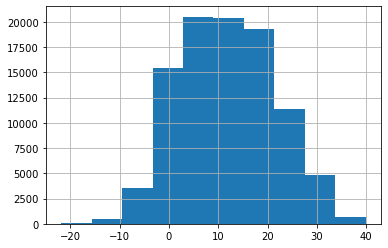

In [6]:
df['Temperature (C)'].hist()

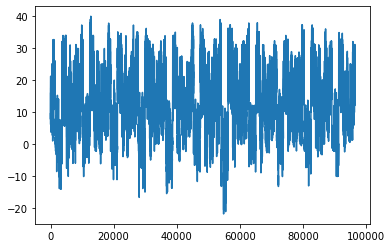

In [7]:
df['Temperature (C)'].plot()

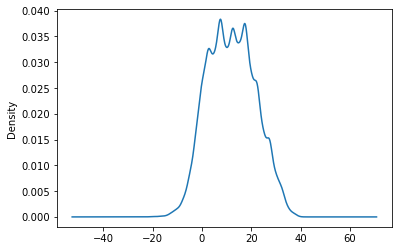

In [7]:
grafico = df['Temperature (C)'].plot(kind='kde')

## Condicionales
  * <code>df["columna"]["condicion"] </code> <br>
   Se devuelven todos los valores de esa columna que cumplan la condición

In [ ]:
media_humedad = df["Humidity"].mean()
df[df["Humidity"] <= media_humedad]

In [ ]:
# Mostrar la temperatura cuya humedad sea menor o igual que la media de humedades 
df['Temperature (C)'][df['Humidity'] <= df['Humidity'].mean()]

In [ ]:
# Mostrar la temperatura cuya temperatura sea mayor o igual que la media de temperaturas 
df['Temperature (C)'][d# f['Temperature (C)'] >= df['Temperature (C)'].mean()]

In [ ]:
df[df["Summary"] == "Foggy"]

In [ ]:
df[df["Precip Type"] == "snow"]

In [ ]:
# Condiciones con AND
df[(df["Precip Type"] == "snow") & (df["Summary"] == "Foggy")]

In [ ]:
# Condiciones con OR
df[(df["Precip Type"] == "snow") | (df["Summary"] == "Foggy")]

## Otras funciones

In [ ]:
# Convertir a mayusculas la columna Summary
df["Summary"] = df["Summary"].str.upper()
df["Summary"]

In [ ]:
# Convertir a minusculas la columna Summary
df["Summary"] = df["Summary"].str.lower()
df["Summary"]

In [ ]:
# Capitalizar la columna Summary
df["Summary"] = df["Summary"].str.capitalize()
df["Summary"]

In [ ]:
# Capitalizar todas las palabras de la columna Summary
df["Summary"] = df["Summary"].str.title()
df["Summary"]

In [ ]:
# Intercambiar mayusculas por minusculas
df["Summary"] = df["Summary"].str.swapcase()
df["Summary"]

In [ ]:
# Comprobar los registros unicos de una columna
df["Temperature (C)"].unique()
print("Num registros: ", len(df["Temperature (C)"].unique()))
print("Num registros: ", df["Temperature (C)"].unique().shape)

In [ ]:
# Filtrado con loc
df.loc[df["Summary"] == "Foggy"]

In [ ]:
df["Summary"].loc[df["Summary"] == "Foggy"]

In [ ]:
df.loc[df["Summary"]=="Foggy",["Temperature (C)","Humidity"]]

## Conversión
En ocasiones, se necesita convertir una serie de pandas en una lista para poder trabajar de forma nativa desde Python

### Conversión de una columna a lista

In [ ]:
temps = df['Temperature (C)']
print(type(temps)) # Como se ve, temps es una serie de panda

temps_list = df['Temperature (C)'].tolist() 
print(type(temps_list))

print("\nListado de temperaturas")
for t in temps_list:
    print(round(t, 2))

### Conversión de todo el dataframe a una lista

In [ ]:
df.to_dict('list')

### Conversión de todo el dataframe a un diccionario

In [ ]:
df_dict = df.to_dict('dict')
# Mostrar las claves
for i in df_dict:
    print(i)

### Conversión de todo el dataframe a series

In [ ]:
df.to_dict('series')